In [1]:
import pandas as pd
filename = r'C:\Users\Danny\thinkstats2\ThinkStats2\code\nbagames1985to2019_cleaned.csv'
df = pd.read_csv(filename, index_col=None, header=0)
df.head()
import numpy as np
import thinkplot
import thinkstats2 as ts2
import regression
import statsmodels.formula.api as smf

In [2]:
def ScatterFit(col_name, ColumnName):    
    inter, slope = ts2.LeastSquares(df[col_name], df.PLUS_MINUS)
    fit_xs, fit_ys = ts2.FitLine(df[col_name], inter, slope)
    thinkplot.Scatter(df[col_name], df.PLUS_MINUS, color='gray', alpha=0.1)
    thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
    thinkplot.Plot(fit_xs, fit_ys, color='blue', linewidth=2)
    thinkplot.config(title=f'Linear Fit of Regression for {ColumnName} vs. PlusMinus'
                    , xlabel=f'{ColumnName}', ylabel='PlusMinus')

In [3]:
def ScatterFitSave(col_name, ColumnName):
    inter, slope = ts2.LeastSquares(df[col_name], df.PLUS_MINUS)
    fit_xs, fit_ys = ts2.FitLine(df[col_name], inter, slope)
    thinkplot.Scatter(df[col_name], df.PLUS_MINUS, color='gray', alpha=0.1)
    thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
    thinkplot.Plot(fit_xs, fit_ys, color='blue', linewidth=2)
    thinkplot.config(title=f'Linear Fit of Regression for {ColumnName} vs. PlusMinus'
                    , xlabel=f'{ColumnName}', ylabel='PlusMinus')
    thinkplot.Save(root=f'fitmodel_{col_name}')

In [4]:
ScatterFitSave('DREB', 'Defensive Rebounds')

Writing fitmodel_DREB.pdf
Writing fitmodel_DREB.png


<Figure size 576x432 with 0 Axes>

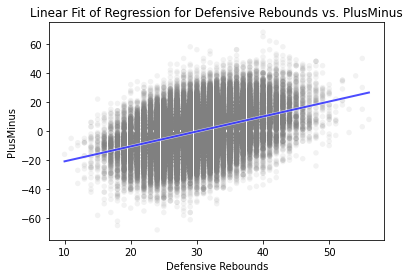

In [5]:
ScatterFit('DREB', 'Defensive Rebounds')

In [6]:
ScatterFitSave('STL', 'Steals')

Writing fitmodel_STL.pdf
Writing fitmodel_STL.png


<Figure size 576x432 with 0 Axes>

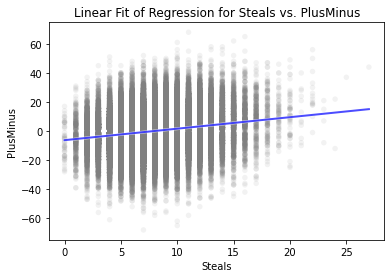

In [7]:
ScatterFit('STL', 'Steals')

In [8]:
ScatterFitSave('BLK', 'Blocks')

Writing fitmodel_BLK.pdf
Writing fitmodel_BLK.png


<Figure size 576x432 with 0 Axes>

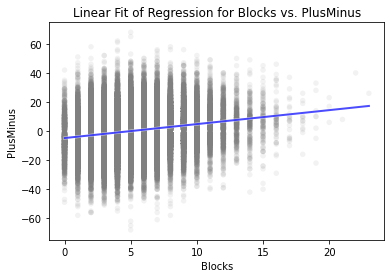

In [9]:
ScatterFit('BLK', 'Blocks')

In [10]:
ScatterFitSave('OPP_PTS', "Opponents' Points")

Writing fitmodel_OPP_PTS.pdf
Writing fitmodel_OPP_PTS.png


<Figure size 576x432 with 0 Axes>

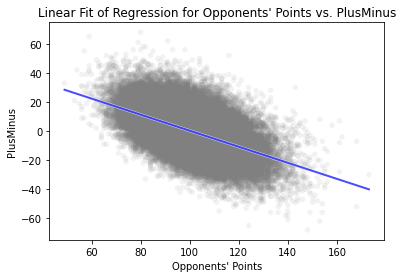

In [11]:
ScatterFit('OPP_PTS', "Opponents' Points")

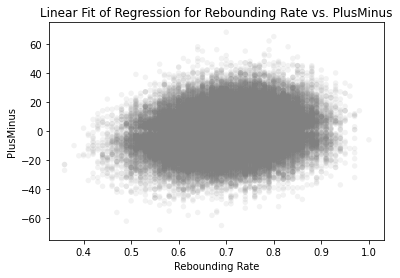

In [12]:
ScatterFit('REB_RATE', 'Rebounding Rate')

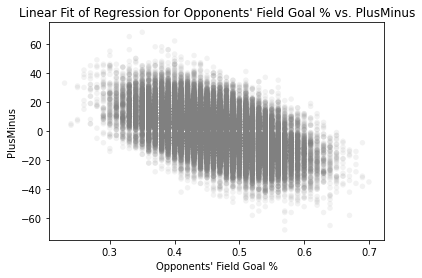

In [13]:
ScatterFit('OPP_FG_PCT', "Opponents' Field Goal %")

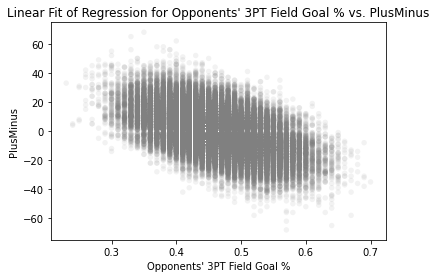

In [14]:
ScatterFit('OPP_FG_PCT', "Opponents' 3PT Field Goal %")

In [15]:
def LogModRes1Var(col_name, sign=str):
    if sign == 'pos':
        max_or_min = 'Minimum'
    else:
        max_or_min = 'Maximum'
    patsy = 'WL ~ '+ col_name
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')
    soln = round(results.params['Intercept']/-results.params[col_name])
    print(f'{max_or_min} Number of {col_name} to Increase Win Chance above 50% is {soln}')

In [16]:
def LogModRes1VarNoRound(col_name, sign=str):
    if sign == 'pos':
        max_or_min = 'Minimum'
    else:
        max_or_min = 'Maximum'
    patsy = 'WL ~ '+ col_name
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')
    soln = round(results.params['Intercept']/-results.params[col_name],3)
    print(f'{max_or_min} Number of {col_name} to Increase Win Chance above 50% is {soln}')

In [17]:
def LogModRes(patsy):
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')

In [18]:
LogModRes1Var('STL', 'pos')

Optimization terminated successfully.
         Current function value: 0.682634
         Iterations 4
Intercept   -0.764   (1.32e-304)
STL   0.0968   (0)
R^2 0.01517
Accuracy of Model at Predicting Wins is 0.557
Minimum Number of STL to Increase Win Chance above 50% is 8


In [ ]:
LogModRes1Var('BLK', 'pos')

In [ ]:
LogModRes1Var('DREB', 'pos')

In [ ]:
LogModRes1VarNoRound('REB_RATE', 'pos')

In [ ]:
LogModRes1Var('OPP_PTS', 'neg')

In [ ]:
LogModRes1VarNoRound('OPP_FG_PCT', 'neg')

In [ ]:
LogModRes1VarNoRound('OPP_3FG_PCT', 'neg')

In [ ]:
LogModRes('WL ~ DREB + STL + BLK + REB_RATE')

In [ ]:
LogModRes('WL ~ DREB + STL + BLK')

In [ ]:
LogModRes('WL ~+ STL + BLK + REB_RATE')

In [ ]:
LogModRes('WL ~ OPP_FG_PCT +OPP_3FG_PCT+ OPP_PTS')